## Load Dataset

- Name: Muhammad Rizki Achirlita
- Gmail: muh.rizkiachirlita@gmail.com

In [3]:
#Basic package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
55609,City Hotel,1,144,2018,October,34,17,2,4,3,...,0,No Deposit,9.0,NaN,0,Personal,140.70,0,0,Canceled
39623,Resort Hotel,0,342,2019,October,33,17,2,5,2,...,0,No Deposit,314.0,NaN,0,Family,110.70,0,0,Check-Out
50480,City Hotel,1,437,2018,July,19,2,1,2,2,...,0,Non Refund,1.0,NaN,0,Personal,60.00,0,0,Canceled
71023,City Hotel,1,35,2019,August,26,27,0,3,1,...,0,No Deposit,9.0,NaN,0,Personal,123.00,0,2,Canceled
104240,City Hotel,0,1,2019,March,1,4,1,4,2,...,0,No Deposit,9.0,NaN,0,Personal,97.16,0,0,Check-Out


## Exploratory Data Analysis

In [193]:
## Check data types
df.info()

## Notes
# children -> int
# agent -> int
# company -> int
# days_in_waiting_list -> int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Split column by data types
cats = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status', 'city']
nums = ['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']

In [195]:
## Check duplicated data
df.duplicated().sum()

33261

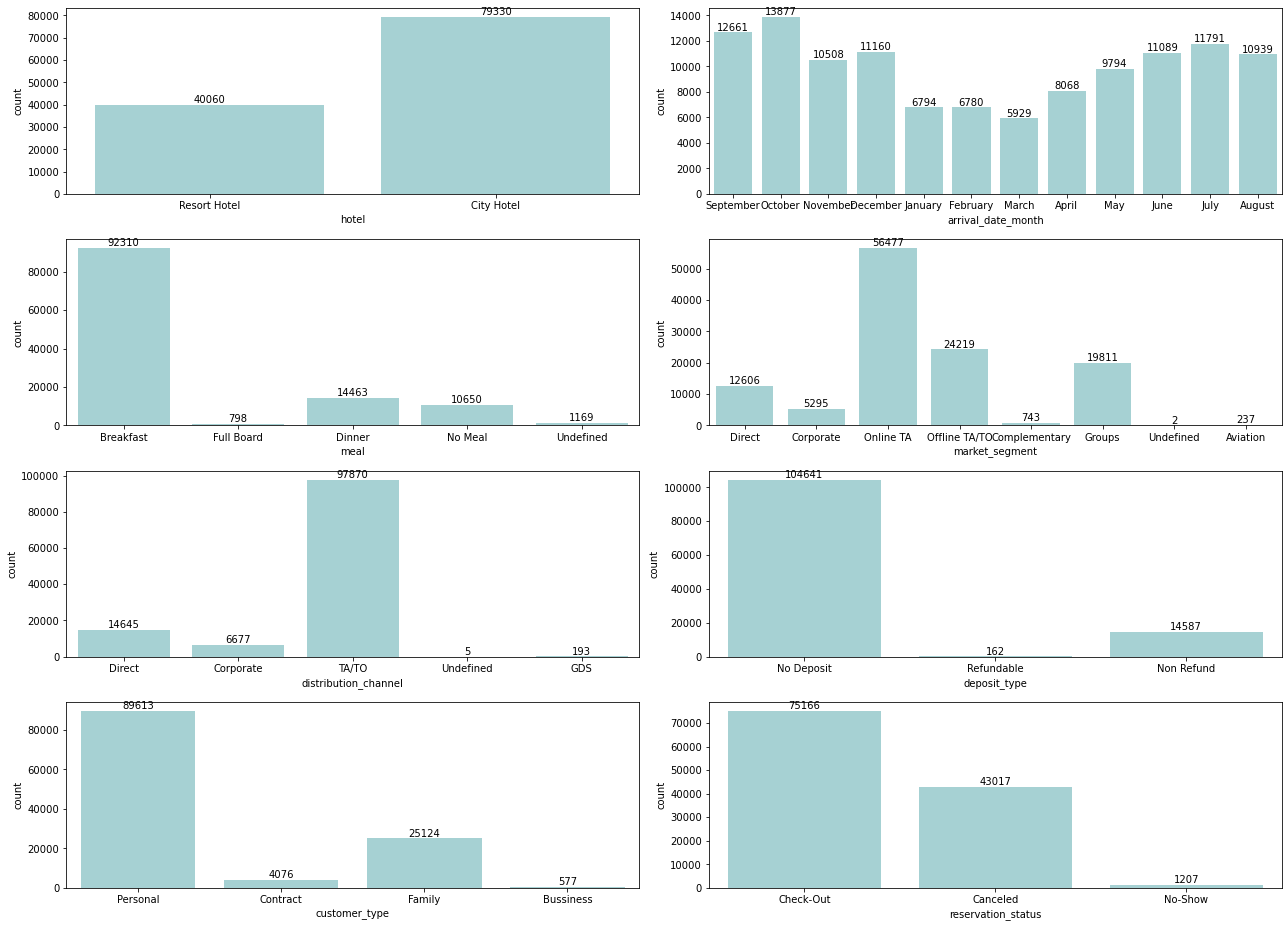

In [6]:
## Check irrational value
feats = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status']
fig, axes = plt.subplots(4, 2, figsize=(18,13))
for x in range(0, len(feats)):
    plt.subplot(4, 2, x+1)
    ax=sns.countplot(x=df[feats[x]], color="#9ed8db")
    ax.bar_label(ax.containers[0])
plt.tight_layout() 

## There is no irrational value

In [7]:
## Check Irrational Value Column City
pd.set_option("display.max_rows", 177)
df['city'].value_counts().sort_values(ascending=False)

## There is no irrational value

Kota Denpasar                      48590
Kabupaten Bangka                   12129
Kota Yogyakarta                    10415
Kota Batu                           8568
Kabupaten Bandung                   7287
Kabupaten Kepulauan Seribu          3766
Kota Malang                         3375
Kabupaten Magelang                  2342
Kota Jakarta Barat                  2224
Kabupaten Belitung                  2104
Kabupaten Sleman                    2097
Kabupaten Sumedang                  1730
Kota Jakarta Timur                  1279
Kabupaten Garut                     1263
Kota Surabaya                       1024
Kota Cimahi                          999
Kota Bogor                           919
Kabupaten Pangandaran                669
Kota Jakarta Selatan                 632
Kota Semarang                        607
Kabupaten Tangerang                  500
Kota Bengkulu                        447
Kota Jakarta Pusat                   435
Kota Jakarta Utara                   426
Kabupaten Pandeg

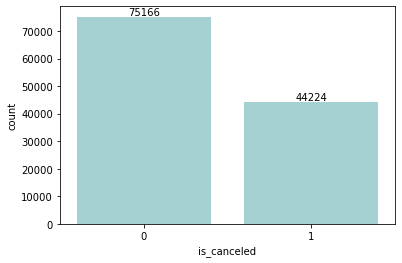

In [8]:
## Check imbalance class
ax= sns.countplot(x=df['is_canceled'], color="#9ed8db")
ax.bar_label(ax.containers[0]);

# There is no imbalance class

In [9]:
## Check the number of missing values
for a in df:
    missing_value = (df[a].isna().sum())
    mv_percentage = round((df[a].isna().sum()/df.shape[0])*100, 2)
    total_mv = df.isna().any(axis = 1).sum()*100/df.shape[0]
    if missing_value == 0:
        pass
    else:
        print(f'Number of missing value {a} = {missing_value} or {mv_percentage}%')
print()
print(f'Total rows missing value = {total_mv:.2f}%')

## Notes:
# children 4
# city 488
# agent 16340
# company 112593 
# Too much null values in 'agent' and 'city', so these columns will drop in Data Preprocessing)

Number of missing value children = 4 or 0.0%
Number of missing value city = 488 or 0.41%
Number of missing value agent = 16340 or 13.69%
Number of missing value company = 112593 or 94.31%

Total rows missing value = 99.82%


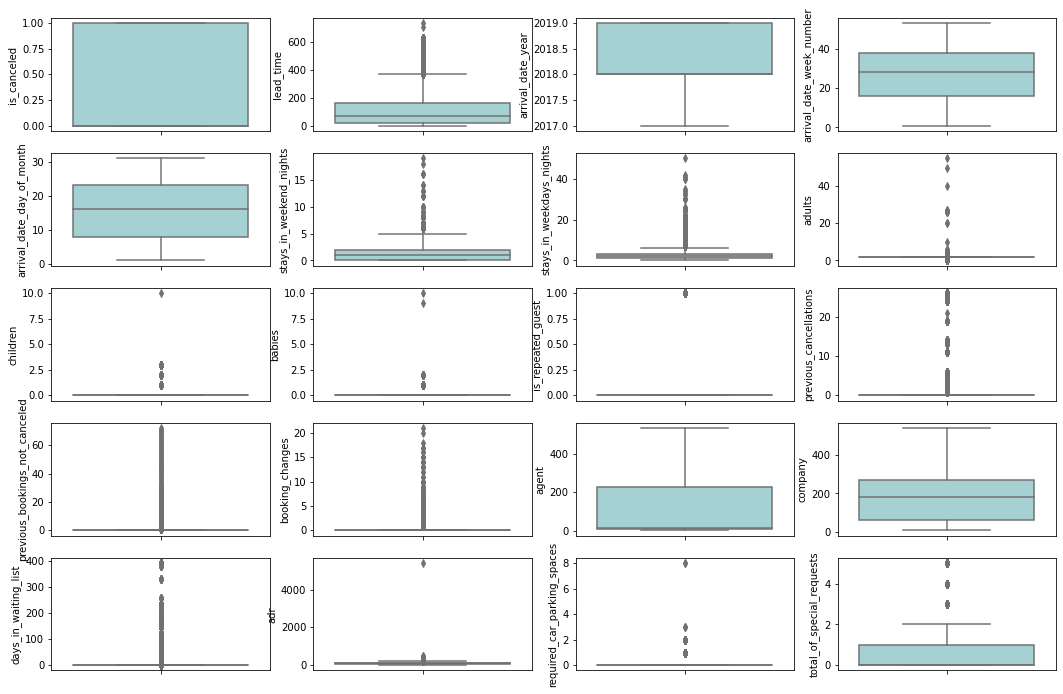

In [119]:
## Check outliers
plt.figure(figsize=(18, 12))
for a in range(0, len(nums)):
    plt.subplot(5, 4, a+1)
    sns.boxplot(y=df[nums[a]], color="#9ed8db")
    
## Notes:
# lead_time
# stays_in_weekend_nights
# stays_in_weekdays_nights
# adults
# children
# babies
# previous_cancelations
# previous_booking_not_canceled
# booking_changes
# days_in_waiting_list
# adr
# required_car_parking_spaces
# total_of_special_requests

In [11]:
## Check the number of outliers
for col in nums:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5*iqr
    up_lim = q3 + 1.5*iqr
    outlier = []
    for x in df[col]:
      if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)
    if len(outlier) != 0 :
      print(f'Number of Outliers in {col} = {len(outlier)}')

Number of Outliers in lead_time = 3005
Number of Outliers in stays_in_weekend_nights = 265
Number of Outliers in stays_in_weekdays_nights = 3354
Number of Outliers in adults = 29710
Number of Outliers in children = 8590
Number of Outliers in babies = 917
Number of Outliers in is_repeated_guest = 3810
Number of Outliers in previous_cancellations = 6484
Number of Outliers in previous_bookings_not_canceled = 3620
Number of Outliers in booking_changes = 18076
Number of Outliers in days_in_waiting_list = 3698
Number of Outliers in adr = 3793
Number of Outliers in required_car_parking_spaces = 7416
Number of Outliers in total_of_special_requests = 2877


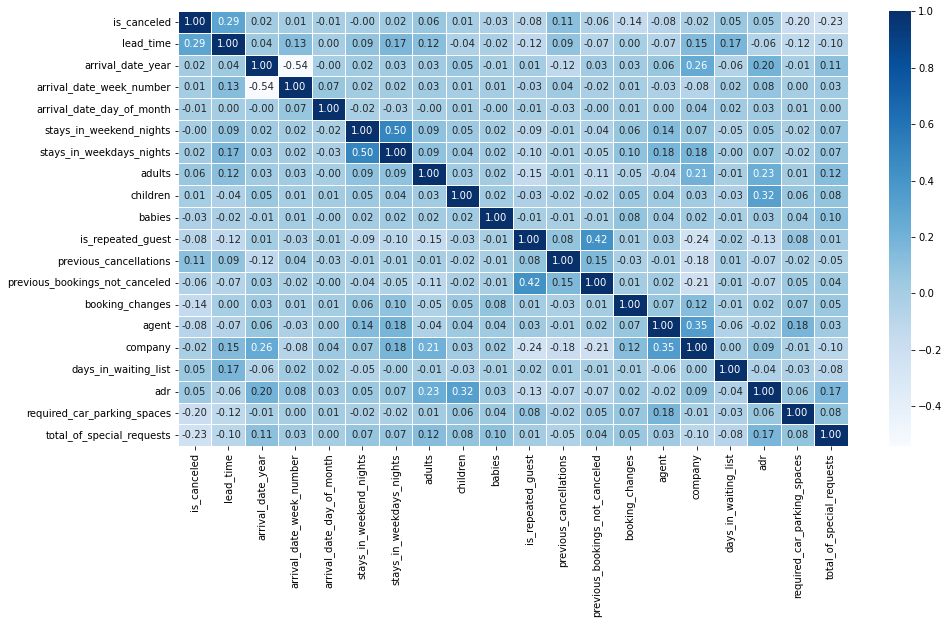

In [137]:
## Multivariate Analysis
plt.figure(figsize=(15, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f', linewidth=1);

### Sumarry EDA

Data types: 
- children -> int
- agent -> int
- company -> int
- days_in_waiting_list -> int 

Data duplicated:
- 33258 data duplicated

Irration values:
- There is no irrational values in category columns

Imbalance class:
- There is no imbalance class

Missing values:
- The number of missing values children = 4 or 0.0%
- The number of missing values city = 488 or 0.41%
- The number of missing values agent = 16340 or 13.69% (agent column will be deleted, because too many the number of missing values and the column does not help in analysis)
- The number of missing value company = 112593 or 94.31% (company column will be deleted, because too many the number of missing values and the column does not help in analysis)

Outliers:
- Number of Outliers in lead_time = 3005
- Number of Outliers in stays_in_weekend_nights = 265
- Number of Outliers in stays_in_weekdays_nights = 3354
- Number of Outliers in adults = 29710
- Number of Outliers in children = 8590
- Number of Outliers in babies = 917
- Number of Outliers in previous_cancellations = 6484
- Number of Outliers in previous_bookings_not_canceled = 3620
- Number of Outliers in booking_changes = 18076
- Number of Outliers in days_in_waiting_list = 3698
- Number of Outliers in adr = 3793
- Number of Outliers in required_car_parking_spaces = 7416
- Number of Outliers in total_of_special_requests = 2877

Multivariate analysis:
- There is no multicolniearity

## Data Preprocessing

### To do list

- Drop columns = company & agent
- Drop duplicated
- Handle Missing value

In [204]:
# Drop column company & agent
df = df.drop(columns=['company', 'agent'], axis=1)

In [205]:
# Drop duplicated values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [207]:
# Drop null values
df = df.dropna()
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

In [13]:
df.to_csv('hotel_after_processing.csv')